<a href="https://colab.research.google.com/github/Imran1hp/Food-Recognition-Deep-Learning-model/blob/main/Food_recognition_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import zipfile
from pathlib import Path


#making the data folder
folder_name = 'pizza_stack_shushi'

data_path = Path("data/")
image_path = data_path / folder_name

if image_path.is_dir():
  print("File already exist skipping download......")

else:
  print(f'{image_path} downloading ......... ')
  image_path.mkdir(parents = True , exist_ok = True )


  #Downloading Data
  with open(data_path / "pizza_stack_shushi.zip" , 'wb') as f:
    url = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/af6548e52663c8395fe2777bd0fbfd6ac85fd6f8/data/pizza_steak_sushi.zip')
    print("Downloading the data............." )
    f.write(url.content)

  #Unzip t he file
  with zipfile.ZipFile( data_path / "pizza_stack_shushi.zip" , 'r' ) as zip_ref:
    print('Unziping the data ')
    zip_ref.extractall(image_path)




File already exist skipping download......


In [12]:
import os



def walk_through_data(dir_path):
  for dirpath , dirnames , filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} ")

In [13]:
image_path

PosixPath('data/pizza_stack_shushi')

In [14]:
walk_through_data(image_path)

There are 2 directories and 0 images in data/pizza_stack_shushi 
There are 3 directories and 0 images in data/pizza_stack_shushi/train 
There are 0 directories and 75 images in data/pizza_stack_shushi/train/steak 
There are 0 directories and 72 images in data/pizza_stack_shushi/train/sushi 
There are 0 directories and 78 images in data/pizza_stack_shushi/train/pizza 
There are 3 directories and 0 images in data/pizza_stack_shushi/test 
There are 0 directories and 19 images in data/pizza_stack_shushi/test/steak 
There are 0 directories and 31 images in data/pizza_stack_shushi/test/sushi 
There are 1 directories and 24 images in data/pizza_stack_shushi/test/pizza 
There are 0 directories and 0 images in data/pizza_stack_shushi/test/pizza/.ipynb_checkpoints 


In [15]:

train_dir = image_path/ 'train'
test_dir =  image_path / 'test'
train_dir , test_dir


(PosixPath('data/pizza_stack_shushi/train'),
 PosixPath('data/pizza_stack_shushi/test'))

data/pizza_stack_shushi/train/sushi/1138695.jpg

 This is a sushi


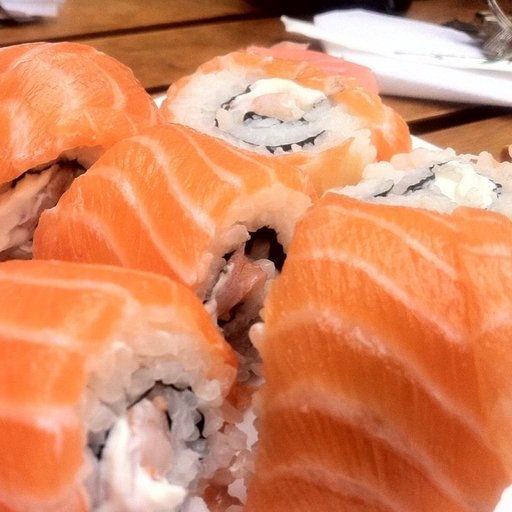

In [34]:
import random
from PIL import Image




img_path_list = list(image_path.glob('*/*/*.jpg'))

random_img_path = random.choice(img_path_list)
print(random_img_path)

img_class = random_img_path.parent.stem
print(f"\n This is a {img_class}")

img = Image.open(random_img_path)

img


In [35]:
img_path_list

[PosixPath('data/pizza_stack_shushi/train/steak/1598345.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/1413972.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/2603058.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/2129685.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/2979061.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/937133.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/3074367.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/443210.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/735441.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/1615395.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/1839481.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/97656.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/1961025.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/256592.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/214320.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/922752.jpg'),


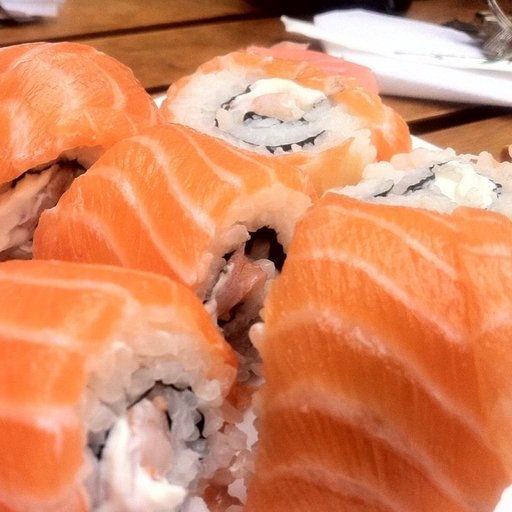

In [36]:
img